In [2]:
#import libraries

import tweepy
import pandas as pd
import numpy as np
import json
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
# consumer keys and access tokens from the twitter api

# ADD YOUR KEYS
consumerKey = "n80bky4mFCYejpVLmPJ6ZRNtk" 
consumerSecret = "m9vZIuFqUu9tGbKliScEITtdOwzt4RInPEPWOBnaqZwfVdYmUq"
accessToken = "1041647062939394048-MABlXhtKLXEglZSZKwttBOwI1xkqDZ"
accessTokenSecret = "W8iIOQtl0oYUu25fylecQ5aPxq8nFTnhJTGKktEHCVxvt"

In [4]:
# Authentication

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)         #   twitter trend api calls has a limited rate 75 per 15 mins 
                                                        #   so wait after 75 calls until api call is available again

In [5]:
# dataframe columns

cols = ['Country','Country_code','Country_woeid','City','City_woeid','trend_1','trend_2','trend_3','trend_4','trend_5']
df = pd.DataFrame(columns=cols)

In [6]:
# parsing the woeid (where on earth id) json file to get countries and cities woeid

with open('woeid.json', 'r') as f:
    woeid = json.load(f)
cities = [] 
city_woeids = []
countries = []
country_woeids = []
country_codes = []

for w in woeid:
    if (w['placeType']['name'] !='Country' and w['placeType']['name'] !='Supername'):
        cities.append(w['name'])
        city_woeids.append(w['woeid'])
        countries.append(w['country'])
        country_woeids.append(w['parentid'])
        country_codes.append(w['countryCode'])
df.Country=countries
df.Country_code=country_codes
df.Country_woeid=country_woeids
df.City=cities
df.City_woeid=city_woeids
df.shape                                   # 404 different cities 

(404, 10)

In [7]:
# parsed data converted to dataframe

df.head()

,Country,Country_code,Country_woeid,City,City_woeid,trend_1,trend_2,trend_3,trend_4,trend_5
0,Canada,CA,23424775,Winnipeg,2972,NaN,NaN,NaN,NaN,NaN
1,Canada,CA,23424775,Ottawa,3369,NaN,NaN,NaN,NaN,NaN
2,Canada,CA,23424775,Quebec,3444,NaN,NaN,NaN,NaN,NaN
3,Canada,CA,23424775,Montreal,3534,NaN,NaN,NaN,NaN,NaN
4,Canada,CA,23424775,Toronto,4118,NaN,NaN,NaN,NaN,NaN


In [8]:
# Search Top5 current trends of a city

city_name = 'Berlin'
wid= df[df['City']==city_name].iloc[0]['City_woeid']
cit_trends = api.trends_place(wid)
cit_trends = json.loads(json.dumps(cit_trends, indent=1))
print("Time of Recording : ", cit_trends[0]['as_of'])
print("-"*100)
for i,trend in enumerate(cit_trends[0]["trends"]) :
    print ((trend["name"]).strip("#"))
    if i >=4:
        break


Time of Recording :  2018-12-14T18:05:37Z
----------------------------------------------------------------------------------------------------
Hammelsprung
GuteKitaGesetz
Heißzeit
rpAccra
FridaysForFuture


In [9]:
cit_trends[0]

{'as_of': '2018-12-14T18:05:37Z',
 'created_at': '2018-12-14T18:04:25Z',
 'locations': [{'name': 'Berlin', 'woeid': 638242}],
 'trends': [{'name': '#Hammelsprung',
   'promoted_content': None,
   'query': '%23Hammelsprung',
   'tweet_volume': None,
   'url': 'http://twitter.com/search?q=%23Hammelsprung'},
  {'name': '#GuteKitaGesetz',
   'promoted_content': None,
   'query': '%23GuteKitaGesetz',
   'tweet_volume': None,
   'url': 'http://twitter.com/search?q=%23GuteKitaGesetz'},
  {'name': '#Heißzeit',
   'promoted_content': None,
   'query': '%23Hei%C3%9Fzeit',
   'tweet_volume': None,
   'url': 'http://twitter.com/search?q=%23Hei%C3%9Fzeit'},
  {'name': '#rpAccra',
   'promoted_content': None,
   'query': '%23rpAccra',
   'tweet_volume': None,
   'url': 'http://twitter.com/search?q=%23rpAccra'},
  {'name': '#FridaysForFuture',
   'promoted_content': None,
   'query': '%23FridaysForFuture',
   'tweet_volume': None,
   'url': 'http://twitter.com/search?q=%23FridaysForFuture'},
  {'name

In [10]:
# calling the twitter trend api for top 5 trends for all the cities parsed and storing them in dataframe

for cwoeid in df.City_woeid:
    trend_five = []
    trends = api.trends_place(cwoeid)
    trends = json.loads(json.dumps(trends, indent=1)) 
    for i,trend in enumerate(trends[0]["trends"]):
        trend_five.append((trend["name"]).strip("#"))
        if i>=4:
            break
    df.loc[df['City_woeid']==cwoeid,['trend_1','trend_2','trend_3','trend_4','trend_5']] = trend_five
    
df.head()
    

,Country,Country_code,Country_woeid,City,City_woeid,trend_1,trend_2,trend_3,trend_4,trend_5
0,Canada,CA,23424775,Winnipeg,2972,FridayFeeling,ThankYouBTS,David Lemieux,Jon Gillies,CBCProjectGive
1,Canada,CA,23424775,Ottawa,3369,CBCProjectGive,Centre Block,icarusfalls,CAFR90,Liberal
2,Canada,CA,23424775,Quebec,3444,FridayFeeling,ThankYouBTS,David Lemieux,Jon Gillies,CBCProjectGive
3,Canada,CA,23424775,Montreal,3534,FridayFeeling,ThankYouBTS,David Lemieux,Jon Gillies,CBCProjectGive
4,Canada,CA,23424775,Toronto,4118,FridayFeeling,ontario power generation,Guatemalan,Kanye,Imagine


In [11]:
# Save the file so you dont have to call api every time

df.to_csv('trends_12-12-2018.csv')

In [12]:
# Read from the csv

df = pd.read_csv('trends_12-12-2018.csv')

In [13]:
# Searching for a specific country trend

df.loc[df['Country']=='Pakistan']

,Unnamed: 0,Country,Country_code,Country_woeid,City,City_woeid,trend_1,trend_2,trend_3,trend_4,trend_5
293,293,Pakistan,PK,23424922,Karachi,2211096,YeQudratiDoodhNahi,PSL4,PMImranKhan,PP168,FawadChaudhry
294,294,Pakistan,PK,23424922,Lahore,2211177,JaunElia,Peshawar,JummaMubarak,PP168,May Allah
295,295,Pakistan,PK,23424922,Multan,2211269,YeQudratiDoodhNahi,CokeFest,PSL4,HonoringAPSMartyrs,JaunElia
296,296,Pakistan,PK,23424922,Rawalpindi,2211387,YeQudratiDoodhNahi,CokeFest,PSL4,HonoringAPSMartyrs,JaunElia
297,297,Pakistan,PK,23424922,Faisalabad,2211574,YeQudratiDoodhNahi,CokeFest,PSL4,HonoringAPSMartyrs,JaunElia


In [14]:
# Separating trends

df_trends = df[['trend_1','trend_2','trend_3','trend_4','trend_5']]
df_trends.head()

,trend_1,trend_2,trend_3,trend_4,trend_5
0,FridayFeeling,ThankYouBTS,David Lemieux,Jon Gillies,CBCProjectGive
1,CBCProjectGive,Centre Block,icarusfalls,CAFR90,Liberal
2,FridayFeeling,ThankYouBTS,David Lemieux,Jon Gillies,CBCProjectGive
3,FridayFeeling,ThankYouBTS,David Lemieux,Jon Gillies,CBCProjectGive
4,FridayFeeling,ontario power generation,Guatemalan,Kanye,Imagine


In [15]:
# Counting the frequency of all the top 5 trends in all 404 cities

counts_1 = df_trends['trend_1'].value_counts().to_dict()
counts_2 = df_trends['trend_2'].value_counts().to_dict()
counts_3 = df_trends['trend_3'].value_counts().to_dict()
counts_4 = df_trends['trend_4'].value_counts().to_dict()
counts_5 = df_trends['trend_5'].value_counts().to_dict()
all_trends = [counts_1 , counts_2 , counts_3 , counts_4 , counts_5]

trend_freq = sum((Counter(dict(x)) for x in all_trends),Counter())
print(trend_freq)

Counter({'ThankYouBTS': 229, 'Chris Christie': 40, 'FridayFeeling': 40, 'SandyHook': 34, 'ChristmasJumperDay': 28, 'BuenViernes': 22, '大恋愛': 20, 'Scott Walker': 20, 'Thala59': 20, 'ナランチャ': 20, 'PantoDay': 20, 'bananamoon': 20, 'BlendersPrideFashionTour': 19, 'Ukrainian': 19, 'рунета': 19, 'Kanye': 19, 'IshaAmbaniReception': 19, 'владивосток': 18, 'UberSanta': 17, 'ChowkidarPureChorHai': 17, 'アニサマ': 16, '流れ星': 16, 'FelizCumpleDJZurita': 16, 'Seguro Popular': 16, 'J Hus': 16, 'nebulous': 15, '간식거리_호불호': 14, '플레디스_계정통합_결사반대': 14, 'Happy33rdXIADAY': 13, 'SongOfTheYearTWICE': 12, 'PBBMayWardVis8': 11, '2019Debate': 11, 'JagoanDagelanOke': 11, 'TolakKotakKardusKPU': 11, 'Wanna One': 11, '3DekadeTRANSMEDIA': 11, 'ALDUBNationMunificent': 10, '2018MAMA': 10, 'S_TAEYEON_ConcertinManila': 10, 'Love Scenario': 10, 'Банк России': 10, 'AtatürkSempozyumu': 9, 'MSVHSV': 9, 'Christmas': 8, 'spitzestifte': 8, 'küllerindendoğmak': 8, '14Dic': 8, 'Genazino': 8, 'Война': 7, 'OTDirecto14DIC': 7, 'УПЦ МП': 7

In [16]:
# Separating trends with a frequency greater than or equal to 10

trend_freq_1 = { k: v for k, v in trend_freq.items() if v >= 10 }
trend_freq_1

{'2018MAMA': 10,
 '2019Debate': 11,
 '3DekadeTRANSMEDIA': 11,
 'ALDUBNationMunificent': 10,
 'BlendersPrideFashionTour': 19,
 'BuenViernes': 22,
 'ChowkidarPureChorHai': 17,
 'Chris Christie': 40,
 'ChristmasJumperDay': 28,
 'FelizCumpleDJZurita': 16,
 'FridayFeeling': 40,
 'Happy33rdXIADAY': 13,
 'IshaAmbaniReception': 19,
 'J Hus': 16,
 'JagoanDagelanOke': 11,
 'Kanye': 19,
 'Love Scenario': 10,
 'PBBMayWardVis8': 11,
 'PantoDay': 20,
 'S_TAEYEON_ConcertinManila': 10,
 'SandyHook': 34,
 'Scott Walker': 20,
 'Seguro Popular': 16,
 'SongOfTheYearTWICE': 12,
 'Thala59': 20,
 'ThankYouBTS': 229,
 'TolakKotakKardusKPU': 11,
 'UberSanta': 17,
 'Ukrainian': 19,
 'Wanna One': 11,
 'bananamoon': 20,
 'nebulous': 15,
 'Банк России': 10,
 'владивосток': 18,
 'рунета': 19,
 'アニサマ': 16,
 'ナランチャ': 20,
 '大恋愛': 20,
 '流れ星': 16,
 '간식거리_호불호': 14,
 '플레디스_계정통합_결사반대': 14}

In [17]:
# Separating trends and frequencies in arrays

freq = trend_freq_1.values()
trnds = trend_freq_1.keys()

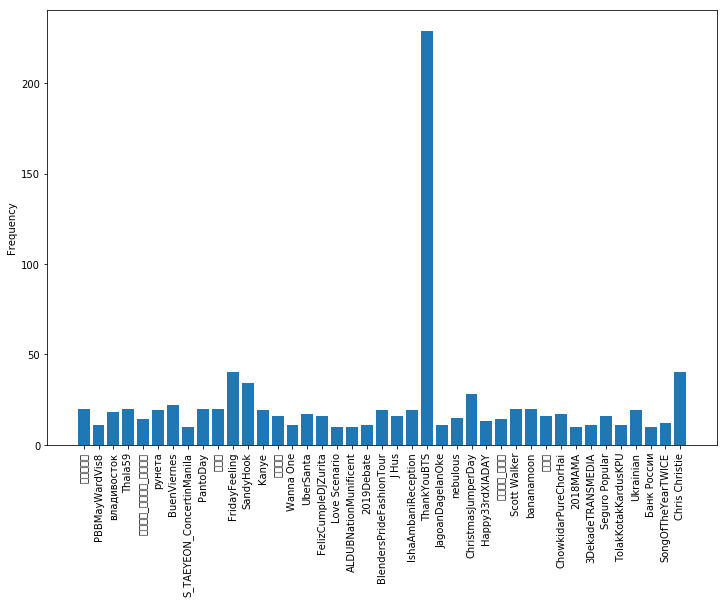

In [20]:
# plotting the trends with frequency. These are the most frequent hashtags rightnow.

fig = plt.figure(figsize=(12,8))
plt.bar(range(len(freq)),freq)
plt.xticks(range(len(trnds)),trnds,rotation=90)
plt.ylabel('Frequency')

plt.show()

In [21]:
fig.savefig('Top_tweets.jpg')